In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("transactions.csv", sep=";", low_memory=False)
sales

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.00,0.00,NaN,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.00,0.00,NaN,DAMAC HILLS (2) - ZINNIA
2,14-563-2022,02/06/2022 15:42,280311,Mortgage,Modify Mortgage,Ready,Non Free Hold,Residential,Al Barshaa South First,Land,...,1188.42,NaN,NaN,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0.00,0.00,NaN,NaN
3,11-12317-2022,02/06/2022 15:22,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,...,600.51,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN
4,11-12316-2022,02/06/2022 15:07,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,112.24,NaN,NaN,NaN,NaN,Dubai Cycling Course,1.00,1.00,NaN,DAMAC HILLS (2) - AMARGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995970,13-1699-1996,14/02/1996 00:00,256488,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Manara,Land,...,1393.55,NaN,NaN,First Abu Dhabi Bank Metro Station,Mall of the Emirates,Burj Al Arab,0.00,0.00,NaN,NaN
995971,13-1701-1996,24/01/1996 00:00,391611,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Satwa,Land,...,1390.01,NaN,NaN,Financial Centre,Dubai Mall,Burj Khalifa,0.00,0.00,NaN,NaN
995972,13-1742-1995,26/10/1995 00:00,216804,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Mezhar Second,Land,...,1858.06,NaN,NaN,Etisalat Metro Station,City Centre Mirdif,Dubai International Airport,0.00,0.00,NaN,NaN
995973,13-1746-1995,18/10/1995 00:00,536243421,Mortgage,Mortgage Registration,Ready,Non Free Hold,Residential,Al Goze First,Land,...,929.03,NaN,NaN,Business Bay Metro Station,Dubai Mall,Downtown Dubai,0.00,0.00,NaN,NaN


In [3]:
sales = sales.loc[sales["Transaction sub type"] == 'Sale']
sales = sales.loc[sales['Property Sub Type'] == 'Flat']
sales

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
8,11-12315-2022,02/06/2022 14:52,41160822,Sales,Sale,Ready,Free Hold,Residential,PALM JUMEIRAH,Unit,...,167.94,2 B/R,NaN,Palm Jumeirah,Marina Mall,Burj Al Arab,1.00,1.00,NaN,GOLDEN MILE
21,11-12307-2022,02/06/2022 14:38,145514541,Sales,Sale,Ready,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,...,36.67,Studio,NaN,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,1.00,1.00,NaN,BLOOM HEIGHTS
29,11-12303-2022,02/06/2022 14:28,53270613,Sales,Sale,Ready,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,...,43.18,Studio,NaN,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,1.00,1.00,NaN,PARK VIEW TOWER
31,11-12302-2022,02/06/2022 14:26,722736,Sales,Sale,Ready,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,...,44.50,Studio,NaN,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,1.00,1.00,NaN,DIAMOND VIEWS 1
37,11-12300-2022,02/06/2022 14:24,615252,Sales,Sale,Ready,Free Hold,Residential,BURJ KHALIFA,Unit,...,84.54,1 B/R,NaN,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,2.00,1.00,NaN,BURJ VIEWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960310,11-200009-2007,22/05/2007 00:00,453366,Sales,Sale,Ready,Free Hold,Residential,THE GREENS,Unit,...,197.70,3 B/R,NaN,Dubai Internet City,Marina Mall,Burj Al Arab,2.00,1.00,NaN,NaN
960574,11-200004-2007,13/05/2007 00:00,459723,Sales,Sale,Ready,Free Hold,Residential,DUBAI MARINA,Unit,...,120.69,2 B/R,B4-45,Marina Towers,Marina Mall,Burj Al Arab,1.00,1.00,NaN,NaN
960667,11-200003-2007,08/05/2007 00:00,452442,Sales,Sale,Ready,Free Hold,Residential,DUBAI MARINA,Unit,...,194.52,3 B/R,P2-09,Marina Towers,Marina Mall,Burj Al Arab,1.00,1.00,NaN,NaN
960824,11-200002-2007,02/05/2007 00:00,453945,Sales,Sale,Ready,Free Hold,Residential,DUBAI MARINA,Unit,...,69.32,1 B/R,B3-40,Marina Towers,Marina Mall,Burj Al Arab,1.00,1.00,NaN,NaN


In [4]:
target = sales[["Transaction Date", "Amount", "Transaction Size (sq.m)"]]
target['Transaction Date'] = pd.to_datetime(target['Transaction Date'])
target.set_index('Transaction Date', inplace=True)
target

,Amount,Transaction Size (sq.m)
Transaction Date,,
2022-02-06 14:52:00,1900000.00,167.94
2022-02-06 14:38:00,395000.00,36.67
2022-02-06 14:28:00,540000.00,43.18
2022-02-06 14:26:00,275000.00,44.50
2022-02-06 14:24:00,970000.00,84.54
...,...,...
2007-05-22 00:00:00,933800.00,197.70
2007-05-13 00:00:00,836381.00,111.00
2007-08-05 00:00:00,1656423.00,177.01


In [5]:
target["price per square meter"] = target["Amount"] / target["Transaction Size (sq.m)"] 
target

,Amount,Transaction Size (sq.m),price per square meter
Transaction Date,,,
2022-02-06 14:52:00,1900000.00,167.94,11313.56
2022-02-06 14:38:00,395000.00,36.67,10771.75
2022-02-06 14:28:00,540000.00,43.18,12505.79
2022-02-06 14:26:00,275000.00,44.50,6179.78
2022-02-06 14:24:00,970000.00,84.54,11473.86
...,...,...,...
2007-05-22 00:00:00,933800.00,197.70,4723.32
2007-05-13 00:00:00,836381.00,111.00,7534.96
2007-08-05 00:00:00,1656423.00,177.01,9357.79


In [6]:
target = target.drop(["Amount","Transaction Size (sq.m)"], axis=1)
target

,price per square meter
Transaction Date,
2022-02-06 14:52:00,11313.56
2022-02-06 14:38:00,10771.75
2022-02-06 14:28:00,12505.79
2022-02-06 14:26:00,6179.78
2022-02-06 14:24:00,11473.86
...,...
2007-05-22 00:00:00,4723.32
2007-05-13 00:00:00,7534.96
2007-08-05 00:00:00,9357.79


In [7]:
moyenne_vente = target.resample('m').mean()
moyenne_vente

,price per square meter
Transaction Date,
2007-01-31,6471.09
2007-02-28,6734.72
2007-03-31,6112.73
2007-04-30,6925.62
2007-05-31,6544.84
...,...
2022-08-31,10982.08
2022-09-30,12223.63
2022-10-31,11993.79


In [8]:
moyenne_vente.to_csv("average.csv")

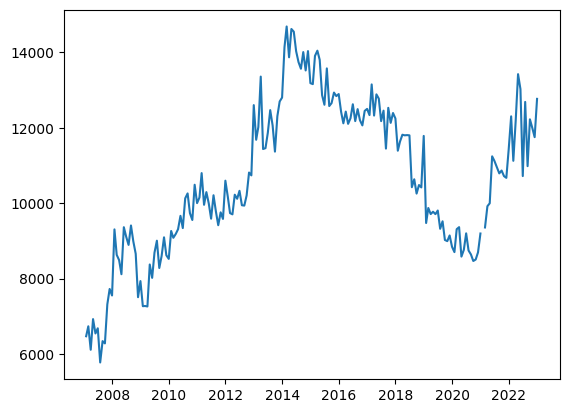

In [9]:
plt.plot(moyenne_vente)

In [10]:
moyenne_vente.loc['2021-01-31', 'price per square meter'] = (moyenne_vente.loc['2021-02-28', 'price per square meter'] + moyenne_vente.loc['2020-12-31', 'price per square meter']) / 2

In [11]:
moyenne_vente.loc['2021-01-31', 'price per square meter']

9275.724598699602

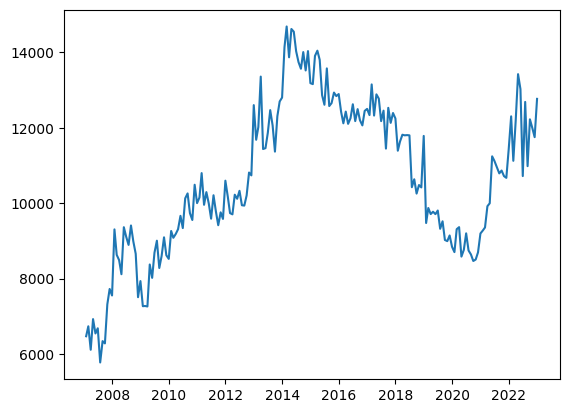

In [12]:
plt.plot(moyenne_vente)

In [13]:
target['date'] = target.index
target

,price per square meter,date
Transaction Date,,
2022-02-06 14:52:00,11313.56,2022-02-06 14:52:00
2022-02-06 14:38:00,10771.75,2022-02-06 14:38:00
2022-02-06 14:28:00,12505.79,2022-02-06 14:28:00
2022-02-06 14:26:00,6179.78,2022-02-06 14:26:00
2022-02-06 14:24:00,11473.86,2022-02-06 14:24:00
...,...,...
2007-05-22 00:00:00,4723.32,2007-05-22 00:00:00
2007-05-13 00:00:00,7534.96,2007-05-13 00:00:00
2007-08-05 00:00:00,9357.79,2007-08-05 00:00:00


In [14]:
target['mois_precedent'] = (target['date'] - pd.DateOffset(months=1)) + pd.offsets.MonthEnd(1)
target

,price per square meter,date,mois_precedent
Transaction Date,,,
2022-02-06 14:52:00,11313.56,2022-02-06 14:52:00,2022-01-31 14:52:00
2022-02-06 14:38:00,10771.75,2022-02-06 14:38:00,2022-01-31 14:38:00
2022-02-06 14:28:00,12505.79,2022-02-06 14:28:00,2022-01-31 14:28:00
2022-02-06 14:26:00,6179.78,2022-02-06 14:26:00,2022-01-31 14:26:00
2022-02-06 14:24:00,11473.86,2022-02-06 14:24:00,2022-01-31 14:24:00
...,...,...,...
2007-05-22 00:00:00,4723.32,2007-05-22 00:00:00,2007-04-30 00:00:00
2007-05-13 00:00:00,7534.96,2007-05-13 00:00:00,2007-04-30 00:00:00
2007-08-05 00:00:00,9357.79,2007-08-05 00:00:00,2007-07-31 00:00:00


In [15]:
target['mois_precedent'] = target['mois_precedent'].dt.date
target['mois_precedent'] = pd.to_datetime(target['mois_precedent'])
target

,price per square meter,date,mois_precedent
Transaction Date,,,
2022-02-06 14:52:00,11313.56,2022-02-06 14:52:00,2022-01-31
2022-02-06 14:38:00,10771.75,2022-02-06 14:38:00,2022-01-31
2022-02-06 14:28:00,12505.79,2022-02-06 14:28:00,2022-01-31
2022-02-06 14:26:00,6179.78,2022-02-06 14:26:00,2022-01-31
2022-02-06 14:24:00,11473.86,2022-02-06 14:24:00,2022-01-31
...,...,...,...
2007-05-22 00:00:00,4723.32,2007-05-22 00:00:00,2007-04-30
2007-05-13 00:00:00,7534.96,2007-05-13 00:00:00,2007-04-30
2007-08-05 00:00:00,9357.79,2007-08-05 00:00:00,2007-07-31


In [16]:
df_final = target.merge(moyenne_vente, how='left', left_on='mois_precedent', right_index=True)

In [17]:
df_final = df_final.reset_index(drop=True)        

In [18]:
df_final  

,price per square meter_x,date,mois_precedent,price per square meter_y
0,11313.56,2022-02-06 14:52:00,2022-01-31,12303.21
1,10771.75,2022-02-06 14:38:00,2022-01-31,12303.21
2,12505.79,2022-02-06 14:28:00,2022-01-31,12303.21
3,6179.78,2022-02-06 14:26:00,2022-01-31,12303.21
4,11473.86,2022-02-06 14:24:00,2022-01-31,12303.21
...,...,...,...,...
195202,4723.32,2007-05-22 00:00:00,2007-04-30,6925.62
195203,7534.96,2007-05-13 00:00:00,2007-04-30,6925.62
195204,9357.79,2007-08-05 00:00:00,2007-07-31,5775.26
195205,10031.45,2007-02-05 00:00:00,2007-01-31,6471.09


In [19]:
binary = sales[['Is Free Hold?']]
binary['Is Free Hold?'] = binary['Is Free Hold?'].replace({'Free Hold': 1, 'Non Free Hold': 0})
binary = binary.reset_index(drop=True)        
binary

,Is Free Hold?
0,1
1,1
2,1
3,1
4,1
...,...
195202,1
195203,1
195204,1
195205,1


In [20]:
num = sales[['Transaction Size (sq.m)',
'Property Size (sq.m)',]]
num = num.reset_index(drop=True)        
num

,Transaction Size (sq.m),Property Size (sq.m)
0,167.94,167.94
1,36.67,36.67
2,43.18,43.18
3,44.50,44.50
4,84.54,84.54
...,...,...
195202,197.70,197.70
195203,111.00,120.69
195204,177.01,194.52
195205,63.60,69.32


In [21]:
classe = sales[[
'Transaction sub type',
'Nearest Metro',
'Property Sub Type',
'Area',
'Nearest Mall',
'Nearest Landmark',
'Room(s)',  
'Transaction Type',
'Property Type',
]]
classe = classe.reset_index(drop=True)        
classe

,Transaction sub type,Nearest Metro,Property Sub Type,Area,Nearest Mall,Nearest Landmark,Room(s),Transaction Type,Property Type
0,Sale,Palm Jumeirah,Flat,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,Sales,Unit
1,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit
2,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit
3,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit
4,Sale,Buj Khalifa Dubai Mall Metro Station,Flat,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,Sales,Unit
...,...,...,...,...,...,...,...,...,...
195202,Sale,Dubai Internet City,Flat,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,Sales,Unit
195203,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,Sales,Unit
195204,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,Sales,Unit
195205,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,Sales,Unit


In [22]:
for i in list(classe.keys()):   
    print(i, " : ", len(list(classe[i].unique())))

Transaction sub type  :  1
Nearest Metro  :  32
Property Sub Type  :  1
Area  :  71
Nearest Mall  :  6
Nearest Landmark  :  13
Room(s)  :  13
Transaction Type  :  1
Property Type  :  1


In [23]:
df_encoded = pd.get_dummies(classe)
df_encoded = df_encoded.reset_index(drop=True)        
df_encoded

,Transaction sub type_Sale,Nearest Metro_Airport Free Zone,Nearest Metro_Al Jadaf Metro Station,Nearest Metro_Al Jafiliya Metro Station,Nearest Metro_Al Rigga Metro Station,Nearest Metro_Al Sufouh,Nearest Metro_Buj Khalifa Dubai Mall Metro Station,Nearest Metro_Business Bay Metro Station,Nearest Metro_Creek Metro Station,Nearest Metro_DANUBE Metro Station,...,Room(s)_5 B/R,Room(s)_6 B/R,Room(s)_8 B/R,Room(s)_Office,Room(s)_PENTHOUSE,Room(s)_Shop,Room(s)_Single Room,Room(s)_Studio,Transaction Type_Sales,Property Type_Unit
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195202,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
195203,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
195204,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
195205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [24]:
df_final[["price per square meter_y"]]

,price per square meter_y
0,12303.21
1,12303.21
2,12303.21
3,12303.21
4,12303.21
...,...
195202,6925.62
195203,6925.62
195204,5775.26
195205,6471.09


In [25]:
sales = sales.reset_index(drop=True)
sales[["Amount"]]

,Amount
0,1900000.00
1,395000.00
2,540000.00
3,275000.00
4,970000.00
...,...
195202,933800.00
195203,836381.00
195204,1656423.00
195205,638000.00


In [26]:
term_2 = pd.concat([classe,  binary, num, df_final[["price per square meter_y"]], sales[["Amount"]]], axis=1)         
term_2

,Transaction sub type,Nearest Metro,Property Sub Type,Area,Nearest Mall,Nearest Landmark,Room(s),Transaction Type,Property Type,Is Free Hold?,Transaction Size (sq.m),Property Size (sq.m),price per square meter_y,Amount
0,Sale,Palm Jumeirah,Flat,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,Sales,Unit,1,167.94,167.94,12303.21,1900000.00
1,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit,1,36.67,36.67,12303.21,395000.00
2,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit,1,43.18,43.18,12303.21,540000.00
3,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit,1,44.50,44.50,12303.21,275000.00
4,Sale,Buj Khalifa Dubai Mall Metro Station,Flat,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,Sales,Unit,1,84.54,84.54,12303.21,970000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195202,Sale,Dubai Internet City,Flat,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,Sales,Unit,1,197.70,197.70,6925.62,933800.00
195203,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,Sales,Unit,1,111.00,120.69,6925.62,836381.00
195204,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,Sales,Unit,1,177.01,194.52,5775.26,1656423.00
195205,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,Sales,Unit,1,63.60,69.32,6471.09,638000.00


In [27]:
term_2 = term_2.rename(columns={'Amount': 'Price', 'price per square meter_y': 'Average price per square meter (last month)'})
term_2

,Transaction sub type,Nearest Metro,Property Sub Type,Area,Nearest Mall,Nearest Landmark,Room(s),Transaction Type,Property Type,Is Free Hold?,Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price
0,Sale,Palm Jumeirah,Flat,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,Sales,Unit,1,167.94,167.94,12303.21,1900000.00
1,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit,1,36.67,36.67,12303.21,395000.00
2,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit,1,43.18,43.18,12303.21,540000.00
3,Sale,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,Sales,Unit,1,44.50,44.50,12303.21,275000.00
4,Sale,Buj Khalifa Dubai Mall Metro Station,Flat,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,Sales,Unit,1,84.54,84.54,12303.21,970000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195202,Sale,Dubai Internet City,Flat,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,Sales,Unit,1,197.70,197.70,6925.62,933800.00
195203,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,Sales,Unit,1,111.00,120.69,6925.62,836381.00
195204,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,Sales,Unit,1,177.01,194.52,5775.26,1656423.00
195205,Sale,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,Sales,Unit,1,63.60,69.32,6471.09,638000.00


In [28]:
df = term_2.drop(["Transaction Type",'Property Type',"Transaction sub type"], axis=1)
df

,Nearest Metro,Property Sub Type,Area,Nearest Mall,Nearest Landmark,Room(s),Is Free Hold?,Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price
0,Palm Jumeirah,Flat,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,1,167.94,167.94,12303.21,1900000.00
1,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,1,36.67,36.67,12303.21,395000.00
2,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,1,43.18,43.18,12303.21,540000.00
3,Nakheel Metro Station,Flat,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,1,44.50,44.50,12303.21,275000.00
4,Buj Khalifa Dubai Mall Metro Station,Flat,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,1,84.54,84.54,12303.21,970000.00
...,...,...,...,...,...,...,...,...,...,...,...
195202,Dubai Internet City,Flat,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,1,197.70,197.70,6925.62,933800.00
195203,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,1,111.00,120.69,6925.62,836381.00
195204,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,1,177.01,194.52,5775.26,1656423.00
195205,Marina Towers,Flat,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,1,63.60,69.32,6471.09,638000.00


In [29]:
df = df.drop("Property Sub Type", axis=1)

In [30]:
df

,Nearest Metro,Area,Nearest Mall,Nearest Landmark,Room(s),Is Free Hold?,Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price
0,Palm Jumeirah,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,1,167.94,167.94,12303.21,1900000.00
1,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,1,36.67,36.67,12303.21,395000.00
2,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,1,43.18,43.18,12303.21,540000.00
3,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,1,44.50,44.50,12303.21,275000.00
4,Buj Khalifa Dubai Mall Metro Station,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,1,84.54,84.54,12303.21,970000.00
...,...,...,...,...,...,...,...,...,...,...
195202,Dubai Internet City,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,1,197.70,197.70,6925.62,933800.00
195203,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,1,111.00,120.69,6925.62,836381.00
195204,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,1,177.01,194.52,5775.26,1656423.00
195205,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,1,63.60,69.32,6471.09,638000.00


In [31]:
df = df.drop("Is Free Hold?", axis=1)

In [32]:
df

,Nearest Metro,Area,Nearest Mall,Nearest Landmark,Room(s),Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price
0,Palm Jumeirah,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,167.94,167.94,12303.21,1900000.00
1,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,36.67,36.67,12303.21,395000.00
2,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,43.18,43.18,12303.21,540000.00
3,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,44.50,44.50,12303.21,275000.00
4,Buj Khalifa Dubai Mall Metro Station,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,84.54,84.54,12303.21,970000.00
...,...,...,...,...,...,...,...,...,...
195202,Dubai Internet City,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,197.70,197.70,6925.62,933800.00
195203,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,111.00,120.69,6925.62,836381.00
195204,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,177.01,194.52,5775.26,1656423.00
195205,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,63.60,69.32,6471.09,638000.00


In [33]:
df.to_csv("dataset_clean.csv")

In [34]:
df

,Nearest Metro,Area,Nearest Mall,Nearest Landmark,Room(s),Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price
0,Palm Jumeirah,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,167.94,167.94,12303.21,1900000.00
1,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,36.67,36.67,12303.21,395000.00
2,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,43.18,43.18,12303.21,540000.00
3,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,44.50,44.50,12303.21,275000.00
4,Buj Khalifa Dubai Mall Metro Station,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,84.54,84.54,12303.21,970000.00
...,...,...,...,...,...,...,...,...,...
195202,Dubai Internet City,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,197.70,197.70,6925.62,933800.00
195203,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,111.00,120.69,6925.62,836381.00
195204,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,177.01,194.52,5775.26,1656423.00
195205,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,63.60,69.32,6471.09,638000.00


In [35]:
df = df.dropna()

In [36]:
df

,Nearest Metro,Area,Nearest Mall,Nearest Landmark,Room(s),Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price
0,Palm Jumeirah,PALM JUMEIRAH,Marina Mall,Burj Al Arab,2 B/R,167.94,167.94,12303.21,1900000.00
1,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,36.67,36.67,12303.21,395000.00
2,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,43.18,43.18,12303.21,540000.00
3,Nakheel Metro Station,JUMEIRAH VILLAGE CIRCLE,Marina Mall,Sports City Swimming Academy,Studio,44.50,44.50,12303.21,275000.00
4,Buj Khalifa Dubai Mall Metro Station,BURJ KHALIFA,Dubai Mall,Downtown Dubai,1 B/R,84.54,84.54,12303.21,970000.00
...,...,...,...,...,...,...,...,...,...
195202,Dubai Internet City,THE GREENS,Marina Mall,Burj Al Arab,3 B/R,197.70,197.70,6925.62,933800.00
195203,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,2 B/R,111.00,120.69,6925.62,836381.00
195204,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,3 B/R,177.01,194.52,5775.26,1656423.00
195205,Marina Towers,DUBAI MARINA,Marina Mall,Burj Al Arab,1 B/R,63.60,69.32,6471.09,638000.00


In [33]:
test1 = pd.DataFrame(list(df["Nearest Metro"].unique()))
test2 = pd.DataFrame(list(df["Nearest Mall"].unique()))
test3 = pd.DataFrame(list(df["Nearest Landmark"].unique()))
test4 = pd.DataFrame(list(df["Room(s)"].unique()))
test5 = pd.DataFrame(list(df["Area"].unique()))

In [34]:
test1.to_csv("Metro.csv")
test2.to_csv("Mall.csv")
test3.to_csv("Landmark.csv")
test4.to_csv("Rooms.csv")
test5.to_csv("Area.csv")

In [35]:
df = pd.get_dummies(df, columns=[
'Nearest Metro',
'Area',
'Nearest Mall',
'Nearest Landmark',
'Room(s)',               
])
df

,Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price,Nearest Metro_Airport Free Zone,Nearest Metro_Al Jadaf Metro Station,Nearest Metro_Al Jafiliya Metro Station,Nearest Metro_Al Rigga Metro Station,Nearest Metro_Al Sufouh,Nearest Metro_Buj Khalifa Dubai Mall Metro Station,...,Room(s)_3 B/R,Room(s)_4 B/R,Room(s)_5 B/R,Room(s)_6 B/R,Room(s)_8 B/R,Room(s)_Office,Room(s)_PENTHOUSE,Room(s)_Shop,Room(s)_Single Room,Room(s)_Studio
0,167.94,167.94,12303.21,1900000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36.67,36.67,12303.21,395000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,43.18,43.18,12303.21,540000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44.50,44.50,12303.21,275000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,84.54,84.54,12303.21,970000.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195202,197.70,197.70,6925.62,933800.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
195203,111.00,120.69,6925.62,836381.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195204,177.01,194.52,5775.26,1656423.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
195205,63.60,69.32,6471.09,638000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df = df.dropna()

In [37]:
df

,Transaction Size (sq.m),Property Size (sq.m),Average price per square meter (last month),Price,Nearest Metro_Airport Free Zone,Nearest Metro_Al Jadaf Metro Station,Nearest Metro_Al Jafiliya Metro Station,Nearest Metro_Al Rigga Metro Station,Nearest Metro_Al Sufouh,Nearest Metro_Buj Khalifa Dubai Mall Metro Station,...,Room(s)_3 B/R,Room(s)_4 B/R,Room(s)_5 B/R,Room(s)_6 B/R,Room(s)_8 B/R,Room(s)_Office,Room(s)_PENTHOUSE,Room(s)_Shop,Room(s)_Single Room,Room(s)_Studio
0,167.94,167.94,12303.21,1900000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36.67,36.67,12303.21,395000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,43.18,43.18,12303.21,540000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44.50,44.50,12303.21,275000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,84.54,84.54,12303.21,970000.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195202,197.70,197.70,6925.62,933800.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
195203,111.00,120.69,6925.62,836381.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195204,177.01,194.52,5775.26,1656423.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
195205,63.60,69.32,6471.09,638000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
nan_count = df.isna().sum()
list(nan_count)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
X = df.drop(['Price'], axis=1)
y = df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=40)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

import numpy as np
from sklearn.metrics import mean_absolute_error

# Fonction pour calculer la MAE
def calculate_mae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return mae

# Supposons que 'y_test' sont les valeurs réelles et 'y_pred' les valeurs prédites
mae = calculate_mae(y_test, y_pred)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAPE: {mape}%")
print(f"Mean Absolute Error: {mae}")

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Tracer les valeurs prédites par rapport aux valeurs réelles
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(['Price'], axis=1)
y = df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
reg = LinearRegression().fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = reg.predict(X_test)

def calculate_mae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return mae



# Supposons que 'y_test' sont les valeurs réelles et 'y_pred' les valeurs prédites
mae = calculate_mae(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)

print(mse)

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAPE: {mape}%")

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
y = df[['Price']]

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Créer une instance du modèle MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=100).fit(X_train, y_train)

# Entraîner le modèle sur les données d'entraînement
regr.fit(X_train, y_train)

# Utiliser le modèle entraîné pour faire des prédictions sur l'ensemble de test
y_pred = regr.predict(X_test)

# Supposons que 'y_test' sont les valeurs réelles et 'y_pred' les valeurs prédites
mae = calculate_mae(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

In [39]:
import numpy as np

df_2 = df.sample(n=1000)


# Supposons que 'df' est votre DataFrame et que 'target' est la colonne cible
X = df_2.drop(['Price'], axis=1)
y = df_2[['Price']]

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créez et entraînez le modèle
reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Affichez les résultats
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:02<00:00,  1.48s/it]

                                                 Adjusted R-Squared  \
Model                                                                 
ExtraTreesRegressor                                           -0.40   
GradientBoostingRegressor                                     -0.44   
OrthogonalMatchingPursuitCV                                   -0.47   
GammaRegressor                                                -0.48   
XGBRegressor                                                  -0.51   
LassoCV                                                       -0.56   
LassoLarsCV                                                   -0.56   
BaggingRegressor                                              -0.56   
LarsCV                                                        -0.57   
LassoLarsIC                                                   -0.57   
LassoLars                                                     -0.57   
ElasticNet                                                    -0.57   
Poisso

In [41]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

df_2 = df.sample(n=1000)


# Supposons que 'df' est votre DataFrame et que 'target' est la colonne cible
X = df_2.drop(['Price'], axis=1)
y = df_2[['Price']]

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser LazyRegressor
reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)

# Supprimer le QuantileRegressor de la liste des modèles
del reg.models["QuantileRegressor"]

# Entraîner les modèles
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

KeyError: 'QuantileRegressor'

In [42]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

df_2 = df.sample(n=1000)


# Supposons que 'df' est votre DataFrame et que 'target' est la colonne cible
X = df_2.drop(['Price'], axis=1)
y = df_2[['Price']]

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à entraîner
models_to_train = ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'KNeighborsRegressor']

# Initialiser LazyRegressor avec les modèles spécifiés
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=models_to_train)

# Entraîner les modèles
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

'str' object has no attribute '__name__'
Invalid Regressor(s)


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [47]:
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

df_2 = df.sample(n=10000)

X = df_2.drop(['Price'], axis=1)
y = df_2[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

chosen_regressors = [
'ExtraTreesRegressor',
'GradientBoostingRegressor',
'OrthogonalMatchingPursuitCV',
'GammaRegressor',
'XGBRegressor',
'LassoCV',
'LassoLarsCV',
'BaggingRegressor',
'LarsCV',
'LassoLarsIC',
'LassoLars',
'ElasticNet',
'PoissonRegressor',
'BayesianRidge',
'OrthogonalMatchingPursuit',
'RandomForestRegressor',
'RidgeCV',
'HuberRegressor',
'Lasso',
'Ridge',
'TweedieRegressor',
'LGBMRegressor',
'KNeighborsRegressor',
'HistGradientBoostingRegressor',
'DecisionTreeRegressor',
'AdaBoostRegressor',
'ExtraTreeRegressor',
'PassiveAggressiveRegressor',
'ElasticNetCV',
'NuSVR',
'DummyRegressor',
'SVR',
'KernelRidge',
'MLPRegressor',
'LinearSVR',
'SGDRegressor',
'GaussianProcessRegressor',
'RANSACRegressor',
'TransformedTargetRegressor',
'LinearRegression',
'Lars',

]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Affichez les résultats
print(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [05:34<00:00,  8.57s/it]

                                                              Adjusted R-Squared  \
Model                                                                              
ExtraTreesRegressor                                                         0.70   
ExtraTreeRegressor                                                          0.63   
KNeighborsRegressor                                                         0.61   
HistGradientBoostingRegressor                                               0.57   
ElasticNet                                                                  0.55   
LarsCV                                                                      0.55   
LassoLarsIC                                                                 0.54   
LassoLarsCV                                                                 0.54   
LassoLars                                                                   0.54   
BayesianRidge                                                               

In [48]:
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

df_2 = df

X = df_2.drop(['Price'], axis=1)
y = df_2[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

chosen_regressors = [
'ExtraTreesRegressor',
'GradientBoostingRegressor',
'OrthogonalMatchingPursuitCV',
'GammaRegressor',
'XGBRegressor',
'LassoCV',
'LassoLarsCV',
'BaggingRegressor',
'LarsCV',
'LassoLarsIC',
'LassoLars',
'ElasticNet',
'PoissonRegressor',
'BayesianRidge',
'OrthogonalMatchingPursuit',
'RandomForestRegressor',
'RidgeCV',
'HuberRegressor',
'Lasso',
'Ridge',
'TweedieRegressor',
'LGBMRegressor',
'KNeighborsRegressor',
'HistGradientBoostingRegressor',
'DecisionTreeRegressor',
'AdaBoostRegressor',
'ExtraTreeRegressor',
'PassiveAggressiveRegressor',
'ElasticNetCV',
'NuSVR',
'DummyRegressor',
'SVR',
'KernelRidge',
'MLPRegressor',
'LinearSVR',
'SGDRegressor',
'RANSACRegressor',
'TransformedTargetRegressor',
'LinearRegression',
'Lars',

]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Affichez les résultats
print(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 39%|███████████████████████████████▏                                               | 15/38 [18:08<1:52:42, 294.00s/it]

KernelRidge model failed to execute
__init__() missing 1 required positional argument: 'dtype'


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [36:45<00:00, 58.03s/it]

                                                            Adjusted R-Squared  \
Model                                                                            
RandomForestRegressor                                                     0.76   
KNeighborsRegressor                                                       0.74   
GradientBoostingRegressor                                                 0.74   
ExtraTreesRegressor                                                       0.74   
BaggingRegressor                                                          0.72   
HistGradientBoostingRegressor                                             0.71   
PoissonRegressor                                                          0.67   
Ridge                                                                     0.66   
Lasso                                                                     0.66   
LassoCV                                                                   0.66   
RidgeCV         

In [39]:
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

df_2 = df

X = df_2.drop(['Price'], axis=1)
y = df_2[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

chosen_regressors = [
'ExtraTreesRegressor',
'GradientBoostingRegressor',
'OrthogonalMatchingPursuitCV',
'GammaRegressor',
'XGBRegressor',
'LassoCV',
'LassoLarsCV',
'BaggingRegressor',
'LarsCV',
'LassoLarsIC',
'LassoLars',
'ElasticNet',
'PoissonRegressor',
'BayesianRidge',
'OrthogonalMatchingPursuit',
'RandomForestRegressor',
'RidgeCV',
'HuberRegressor',
'Lasso',
'Ridge',
'TweedieRegressor',
'LGBMRegressor',
'KNeighborsRegressor',
'HistGradientBoostingRegressor',
'DecisionTreeRegressor',
'AdaBoostRegressor',
'ExtraTreeRegressor',
'PassiveAggressiveRegressor',
'ElasticNetCV',
'DummyRegressor',
'KernelRidge',
'LinearSVR',
'SGDRegressor',
'RANSACRegressor',
'TransformedTargetRegressor',
'LinearRegression',
'Lars',

]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Affichez les résultats
print(models)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 43%|███████████████████████████████████▏                                              | 15/35 [14:03<27:17, 81.90s/it]

KernelRidge model failed to execute
Unable to allocate 181. GiB for an array with shape (156072, 156072) and data type float64


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [24:08<00:00, 41.38s/it]

                                        Adjusted R-Squared  \
Model                                                        
RandomForestRegressor                                 0.80   
BaggingRegressor                                      0.79   
ExtraTreesRegressor                                   0.78   
KNeighborsRegressor                                   0.78   
HistGradientBoostingRegressor                         0.74   
GradientBoostingRegressor                             0.74   
ExtraTreeRegressor                                    0.71   
DecisionTreeRegressor                                 0.71   
LassoLars                                             0.65   
LassoLarsCV                                           0.65   
LassoLarsIC                                           0.65   
LassoCV                                               0.65   
BayesianRidge                                         0.65   
Ridge                                                 0.65   
RidgeCV 

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

df_2 = df

X = df_2.drop(['Price'], axis=1)
y = df_2[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [42]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
print(f"RMSE: {rmse}")


RMSE: 649339.2340155148


In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.7976884255619047


In [44]:

mae = mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae}")


MAE: 241278.72849081794


In [68]:
y_test = y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [70]:
y_test.shape
y_test = y_test.ravel()

# Ou utilisez reshape pour convertir la forme à (39019,)
y_test = y_test.reshape(-1)
y_test.shape

(39019,)

In [72]:
mape = np.mean(np.abs((y_test.astype(np.float16) - y_pred.astype(np.float16)) / y_test.astype(np.float16))) * 100


array([inf, inf, inf, ..., inf, inf, inf], dtype=float16)

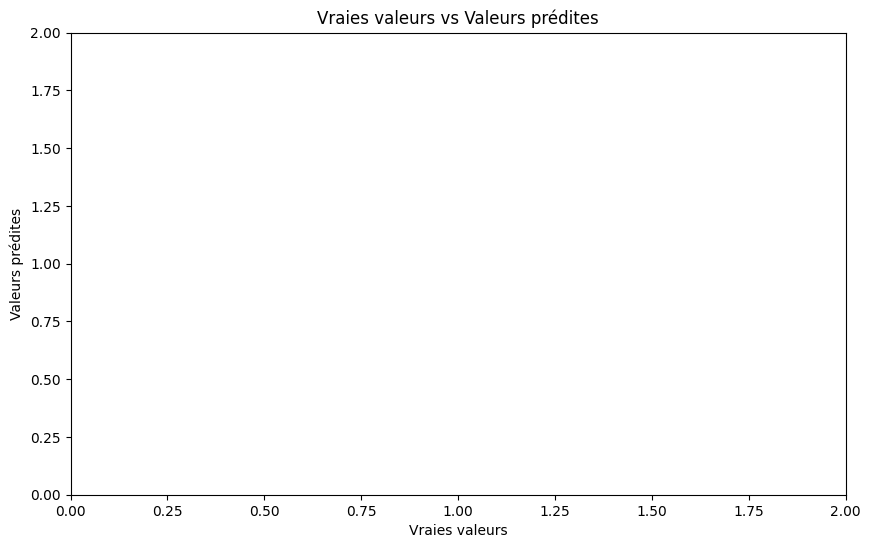

In [54]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Vraies valeurs')
plt.ylabel('Valeurs prédites')
plt.title('Vraies valeurs vs Valeurs prédites')

plt.xlim([0.0, 2.0])
plt.ylim([0.0, 2.0])

plt.show()

In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [49]:
df_2[['Price']].mean()

Price   1218102.62
dtype: float64